In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import Sequential
from keras import backend as K

from time import time
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
%matplotlib inline 

Using TensorFlow backend.


In [2]:
def load_data():
    print('loading data...')
    start = time()
    X = np.loadtxt('data/cropped16.csv', delimiter=',', dtype=np.float32)
    Y = np.loadtxt('data/cropped50.csv', delimiter=',', dtype=np.float32)
    X.shape = (-1,16,16,3)
    Y.shape = (-1,7500)
    print('Job completed in: {} seconds'.format(time()-start))
    return X, Y

X,Y = load_data()

print(X.shape, Y.shape)

#channel last

loading data...
Job completed in: 90.1759901046753 seconds
(5112, 16, 16, 3) (5112, 7500)


In [3]:
x = X/255
y = Y/255
n = 4100
x_train = x[:n]
x_test = x[n:]
y_train = y[:n]
y_test = y[n:]

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (16,16,3),activation='relu', padding='same'))
model.add(Conv2D(64, (3,3),input_shape=(32,32,1),activation='relu'))
model.add(Conv2D(128, (5,5), activation='relu'))
model.add(Flatten())
model.add(Dense(2500, activation='relu'))
model.add(Dense(7500, activation='sigmoid'))

model.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.callbacks import TensorBoard

hist = model.fit(x_train, y_train,
                epochs=150,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[TensorBoard(log_dir='/tmp/model')])
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)


Train on 4100 samples, validate on 1012 samples
Epoch 1/150
4100/4100 [==============================] - 123s - loss: 0.6930 - val_loss: 0.6927
Epoch 2/150
4100/4100 [==============================] - 119s - loss: 0.6918 - val_loss: 0.6865
Epoch 3/150
4100/4100 [==============================] - 120s - loss: 0.6600 - val_loss: 0.6353
Epoch 4/150
4100/4100 [==============================] - 117s - loss: 0.6249 - val_loss: 0.6097
Epoch 5/150
4100/4100 [==============================] - 118s - loss: 0.5949 - val_loss: 0.5868
Epoch 6/150
4100/4100 [==============================] - 121s - loss: 0.5823 - val_loss: 0.5852
Epoch 7/150
4100/4100 [==============================] - 122s - loss: 0.5760 - val_loss: 0.5813
Epoch 8/150
4100/4100 [==============================] - 119s - loss: 0.5732 - val_loss: 0.5743
Epoch 9/150
4100/4100 [==============================] - 117s - loss: 0.5705 - val_loss: 0.5744
Epoch 10/150
4100/4100 [==============================] - 117s - loss: 0.5687 - val_loss

4100/4100 [==============================] - 117s - loss: 0.5376 - val_loss: 0.5417
Epoch 86/150
4100/4100 [==============================] - 117s - loss: 0.5375 - val_loss: 0.5413
Epoch 87/150
4100/4100 [==============================] - 116s - loss: 0.5373 - val_loss: 0.5422
Epoch 88/150
4100/4100 [==============================] - 116s - loss: 0.5372 - val_loss: 0.5416
Epoch 89/150
4100/4100 [==============================] - 117s - loss: 0.5370 - val_loss: 0.5450
Epoch 90/150
4100/4100 [==============================] - 117s - loss: 0.5370 - val_loss: 0.5432
Epoch 91/150
4100/4100 [==============================] - 116s - loss: 0.5368 - val_loss: 0.5412
Epoch 92/150
4100/4100 [==============================] - 117s - loss: 0.5365 - val_loss: 0.5407
Epoch 93/150
4100/4100 [==============================] - 117s - loss: 0.5368 - val_loss: 0.5436
Epoch 94/150
4100/4100 [==============================] - 117s - loss: 0.5366 - val_loss: 0.5398
Epoch 95/150
4100/4100 [===================

- add dropout
   (but said dropout makes val err lower)
- regularize
- weight initialization
- softmax in last layer?

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
...
model.fit(...inputs and parameters..., callbacks=[tbCallBack])

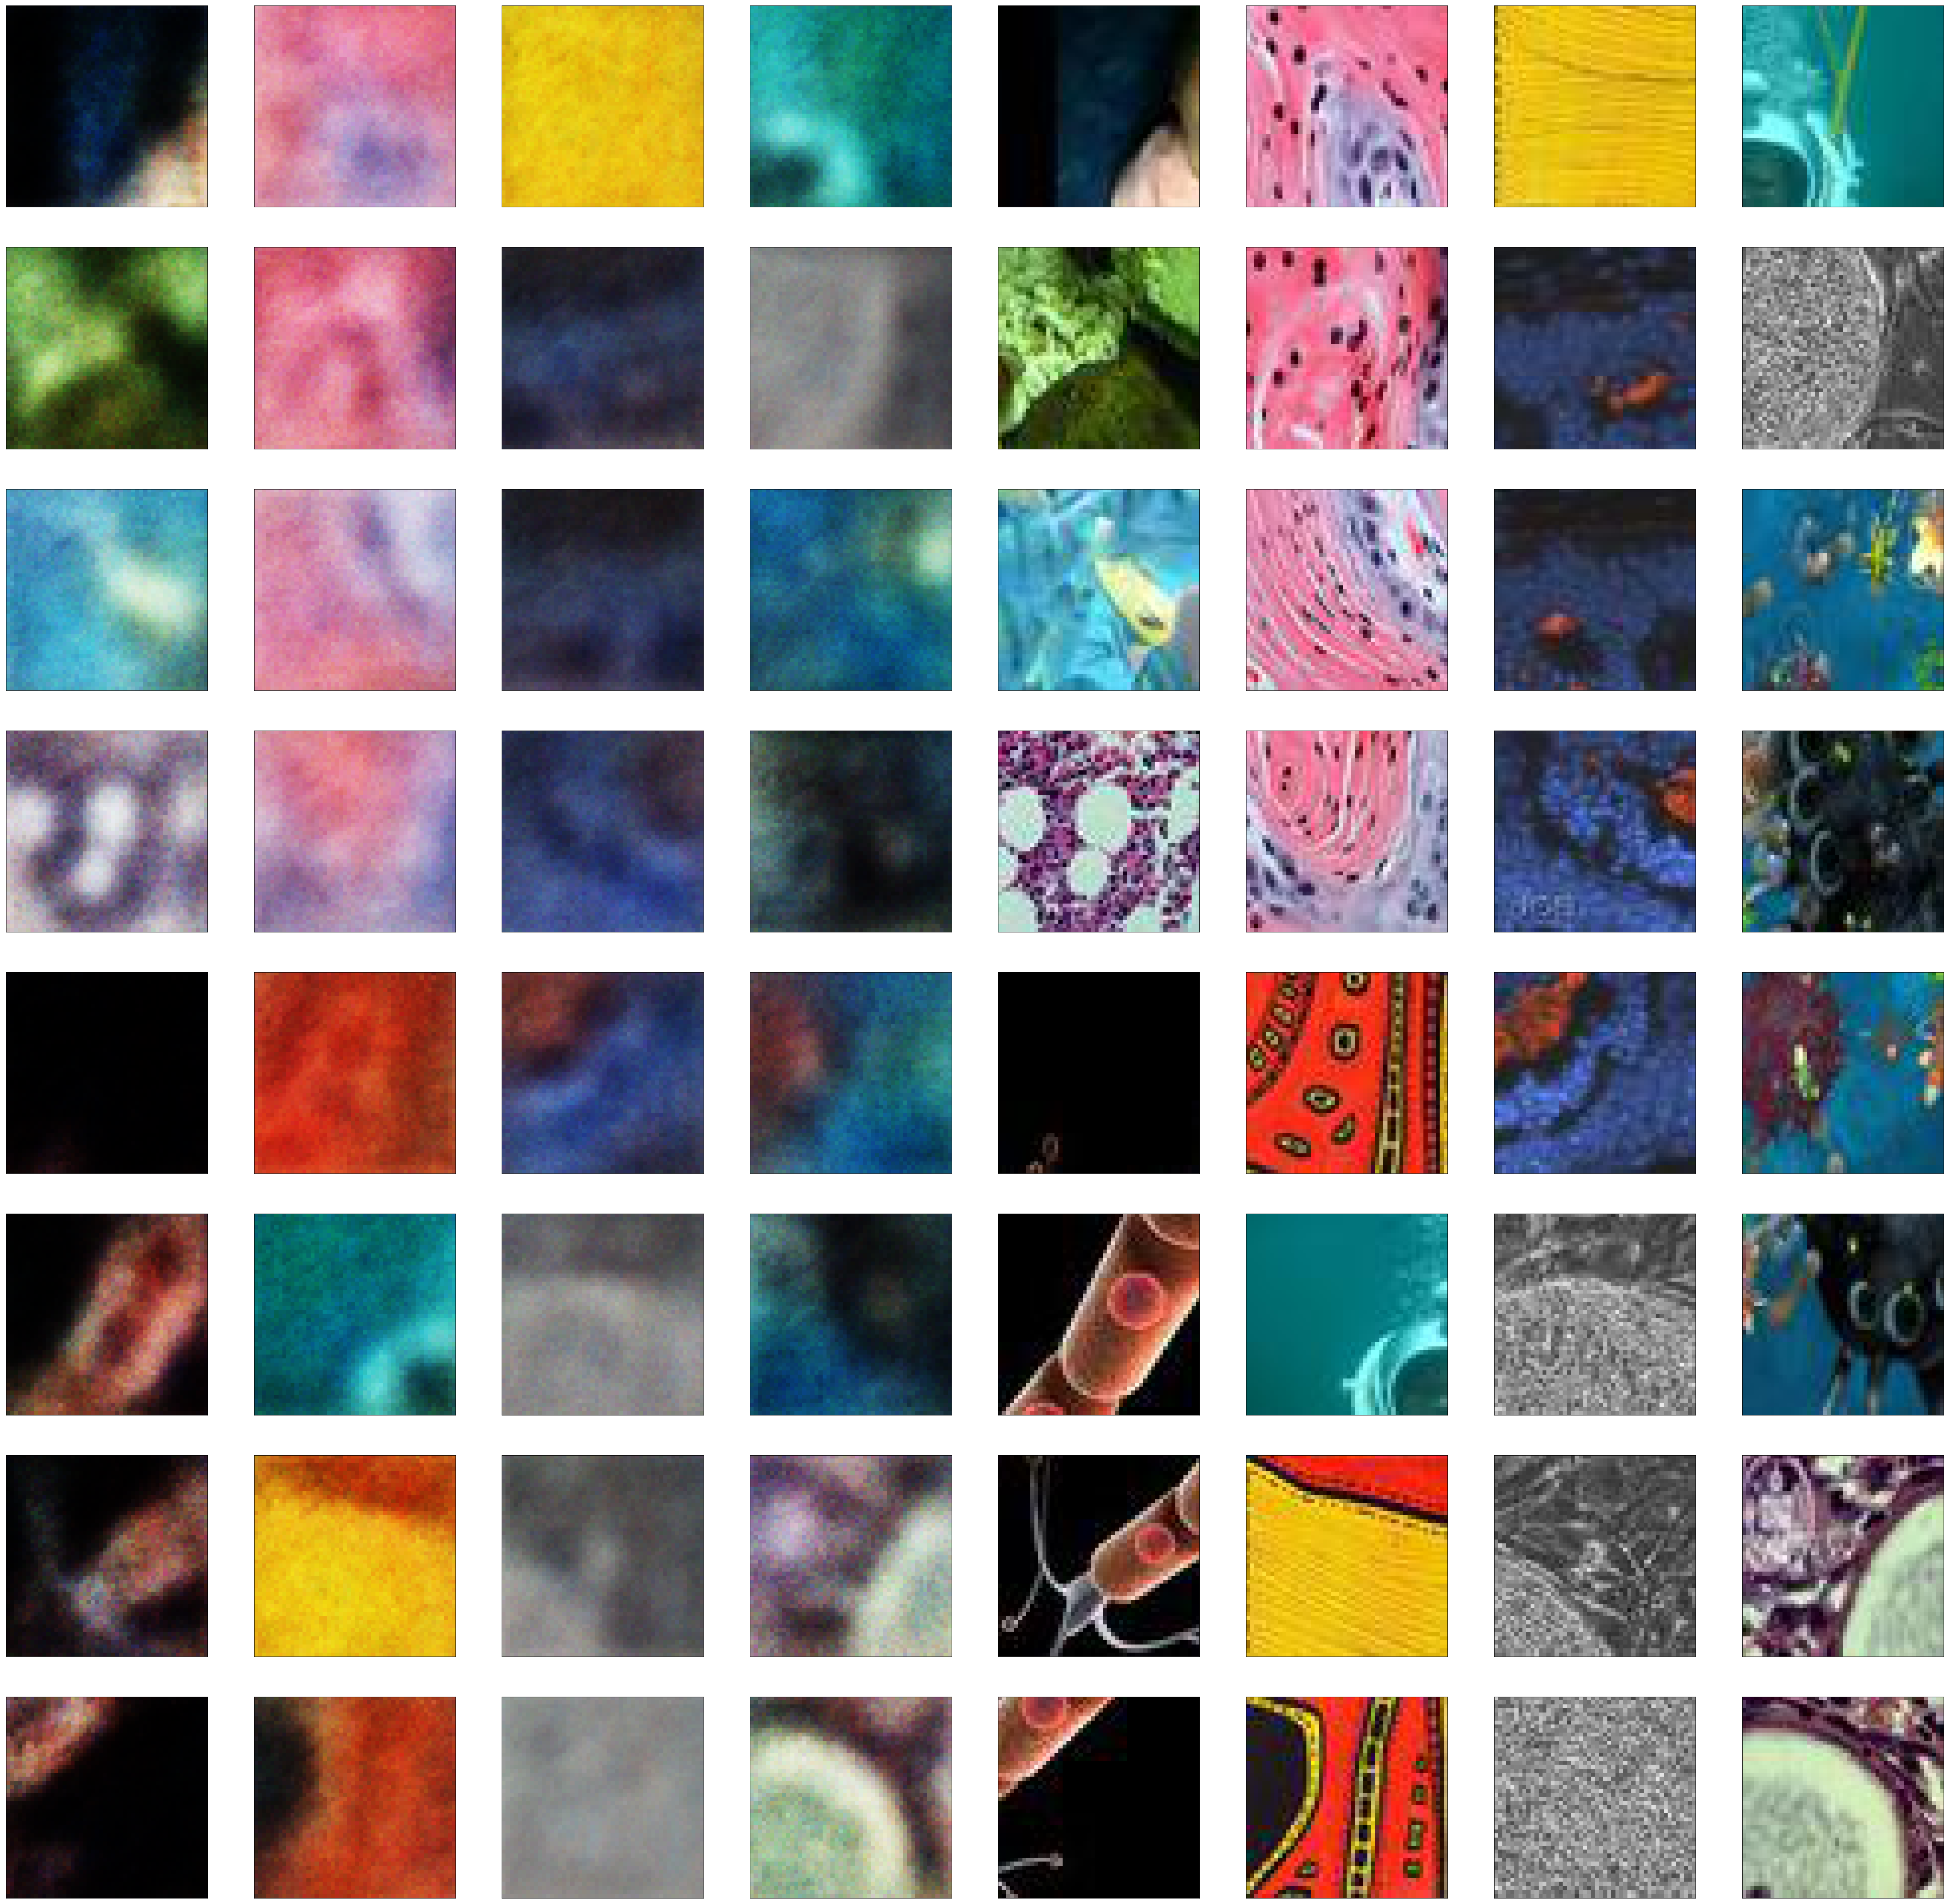

In [5]:
def combine_images(path,filenamelist):
    result = Image.new("RGB", (256, 256))
    for i in range(len(filenamelist)):
        filename = filenamelist[i]
        img = Image.open(path+os.sep+filename)
        img.thumbnail((32,32), Image.ANTIALIAS)
        h = i // 8
        w = (i+1) % 8
        area = ((w-1)*32, h*32, w*32, (h+1)*32)
        result.paste(img, area)
    return result

def predict():
    out_imgs = model.predict(x_train)

    n = 8

    plt.figure(figsize=(64, 64))
    k = 0
    l = 0
    for j in range(n):
        for i in range(n):
            ax = plt.subplot(8,8, j + 1 + 8*i)
            if k < 32:
                plt.imshow(out_imgs[k].reshape(50,50,3))
                k += 1
            else:
                plt.imshow(y_train[l].reshape(50,50,3))
                l += 1
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
    plt.show()
predict()

In [7]:
def no():
    import csv
    import numpy as np
    start = time()
    X = np.loadtxt('data/cropped16.csv', delimiter=',', dtype=np.float32)
    Y = np.loadtxt('data/cropped50.csv', delimiter=',', dtype=np.float32)
    print('file loaded')
    print('Job completed in: {} seconds'.format(time()-start))
    X.shape = (-1,3,256)
    Y.shape = (-1,3,2500)
    iinput = open('data/cropped16.csv', "w")
    output = open('data/cropped50.csv', "w")
    writer1 = csv.writer(iinput, lineterminator='\n')
    writer2 = csv.writer(output, lineterminator='\n')

    for i in range(len(X)):
        x = X[i].T #(256,3)
        y = Y[i].T
        writer1.writerows(x)
        writer2.writerows(y)

    print('finished writing')
    print('Job completed in: {} seconds'.format(time()-start))
    iinput.close()
    output.close()

file loaded
Job completed in: 35.07176065444946 seconds
finished writing
Job completed in: 82.23845720291138 seconds
